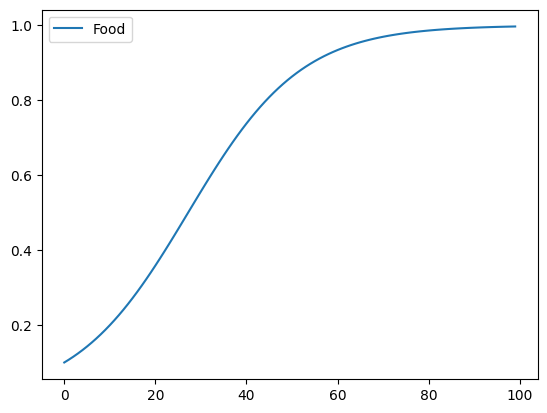

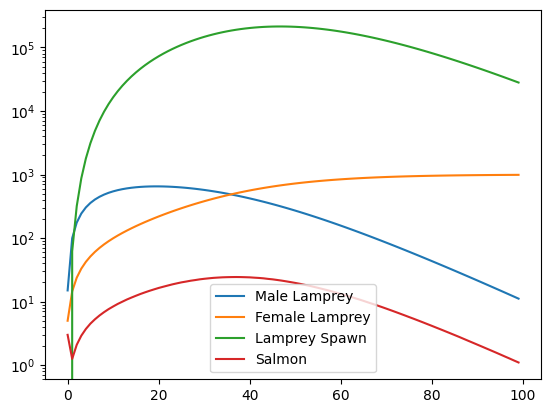

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

y0 = [0.1,15,5,0,3] 
t = [0,100]

par = {
'r' : 0.08,
'k' : 1,
'mu': 0.1,
'gamma':100,
'alpha':0.1,
'sigma':0.1,
'SGR':0.4
}

def LV(t,y,par):
    F,Lm,Lf,L,S = y
    
    dF = par['r'] * F*(1-F/par['k'])

    dLm = par['gamma'] * (1-F)  - par['mu'] * Lm #Change in male lamprey

    dLf = par['gamma'] * F - par['mu'] * Lf #Change in female lamprey

    dL = par['alpha']  * Lm * Lf - par['mu'] * L

    dS = par['sigma'] * Lm * Lf - par['mu'] * S - (Lm + Lf) * S

    return np.array([dF,dLm,dLf,dL,dS])

sol = solve_ivp(fun=lambda t,y :LV(t,y,par),t_span=t,y0=y0,t_eval=np.linspace(0,100,100))

labels = ['Food','Male Lamprey','Female Lamprey','Lamprey Spawn','Salmon']

plt.plot(sol.y[0,:],label = "Food")
plt.legend()
plt.show()

for i in range(1,5):
    plt.plot(sol.y[i,:],label = labels[i])

plt.yscale('log')
plt.legend()
